In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/content/form_41c-price-sh-property-area-by_year_1.csv')

In [3]:
df.head()

,YEAR,Second Hand Property prices,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,NaN,NaN,NaN,NaN,NaN,NaN
1,1969/70,NaN,"6,603",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970/71,NaN,"7,618",NaN,NaN,NaN,NaN,"6,427",NaN,NaN,NaN,NaN,NaN,NaN
3,1971/72,NaN,"8,888",NaN,NaN,NaN,NaN,"7,198",NaN,NaN,NaN,NaN,NaN,NaN
4,1972/73,NaN,"9,828",NaN,NaN,NaN,NaN,"8,054",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(78, 14)

*As we can see in above result that there are a lot of null columns with null values. We will be addressing that issue in data cleaning phase.*



# Data Cleaning



##1.   Addressing the column name issue



In [5]:
# Set the column names from the first row
df.columns = df.iloc[0]

In [6]:
# Remove the row that contains the column names
df = df[1:]

In [7]:
# Add column name for first column
df = df.rename(columns={np.nan:"Year"})
df.head()

,Year,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas,NaN,NaN,NaN,NaN,NaN,NaN
1,1969/70,NaN,"6,603",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970/71,NaN,"7,618",NaN,NaN,NaN,NaN,"6,427",NaN,NaN,NaN,NaN,NaN,NaN
3,1971/72,NaN,"8,888",NaN,NaN,NaN,NaN,"7,198",NaN,NaN,NaN,NaN,NaN,NaN
4,1972/73,NaN,"9,828",NaN,NaN,NaN,NaN,"8,054",NaN,NaN,NaN,NaN,NaN,NaN
5,1974,"11,817","11,777",NaN,NaN,NaN,NaN,"10,851",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index([       'Year',    'National',     'Dublin ',        'Cork',
            'Galway',    'Limerick',   'Waterford', 'Other Areas',
                 nan,           nan,           nan,           nan,
                 nan,           nan],
      dtype='object', name=0)

*Dublin column name has a trailing white space in it. It will cause problems in future. We will address that issue in next step.*



In [9]:
df = df.rename(columns={'Dublin ':"Dublin"})
df.columns

Index([       'Year',    'National',      'Dublin',        'Cork',
            'Galway',    'Limerick',   'Waterford', 'Other Areas',
                 nan,           nan,           nan,           nan,
                 nan,           nan],
      dtype='object', name=0)

*We will be addressing that null column issue in next step.*





##2.   Dropping null columns



In [10]:
# Get the boolean mask for non-NaN column names
mask = ~df.columns.isna()

# Select the columns using the mask
df = df.loc[:, mask]
df.head()

,Year,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
1,1969/70,NaN,"6,603",NaN,NaN,NaN,NaN,NaN
2,1970/71,NaN,"7,618",NaN,NaN,NaN,NaN,"6,427"
3,1971/72,NaN,"8,888",NaN,NaN,NaN,NaN,"7,198"
4,1972/73,NaN,"9,828",NaN,NaN,NaN,NaN,"8,054"
5,1974,"11,817","11,777",NaN,NaN,NaN,NaN,"10,851"


*In **Year** column, we can see years with a forward slash. There are null values in other columns as well. This is causing inconsistency. We will address this issue to maintain consistency.*





##3.   Dropping null values


In [11]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
# By default, when you perform operations like filtering or dropping rows, 
# the index of the DataFrame may become disorganized or contain gaps. 
# The reset_index() function allows you to reassign a new sequential index to 
# the DataFrame and discard the old index.
df.head()

,Year,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1976,"15,303","15,850","15,139","16,858","14,018","14,545","15,361"
1,1977,"17,925","18,778","17,898","20,792","16,681","16,505","18,025"
2,1978,"21,895","22,920","21,427","27,862","20,136","20,381","22,839"
3,1979,"27,598","30,092","27,734","29,539","25,847","22,565","27,137"
4,1980,"30,927","34,129","32,387","32,978","29,656","26,046","32,663"


In [12]:
df.shape

(40, 8)

*It is apparent that rows of our dataset are reduced from 78 to 40 and columns from 14 to 8.*



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         40 non-null     object
 1   National     40 non-null     object
 2   Dublin       40 non-null     object
 3   Cork         40 non-null     object
 4   Galway       40 non-null     object
 5   Limerick     40 non-null     object
 6   Waterford    40 non-null     object
 7   Other Areas  40 non-null     object
dtypes: object(8)
memory usage: 2.6+ KB


*It is evident from above output that all of our columns are mainly of integer nature. Having them in object will cause problems in numerical operations and calculations. We will convert them into numeric data type in next step.*





##4.   Typecasting columns into numeric


In [14]:
df[df.columns] = df[df.columns].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))
# In this modified code, the lambda function is used to apply pd.to_numeric() to each column, after removing the commas using x.str.replace(',', ''). 
# The errors='coerce' parameter is also added to handle any values that cannot be converted to numeric types.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         40 non-null     int64
 1   National     40 non-null     int64
 2   Dublin       40 non-null     int64
 3   Cork         40 non-null     int64
 4   Galway       40 non-null     int64
 5   Limerick     40 non-null     int64
 6   Waterford    40 non-null     int64
 7   Other Areas  40 non-null     int64
dtypes: int64(8)
memory usage: 2.6 KB


# Exploratory Data Analysis



##1.   Price trend in latest 5 years


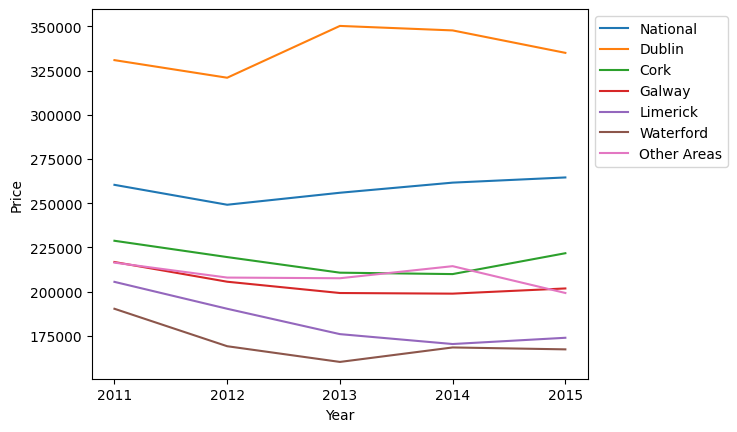

In [17]:
# x-axis array
# years ranging from 2011 to 2015
x = df['Year'][-5:] 

# y-axis arrays 
y_national = np.array(df['National'][-5:])
y_dublin = np.array(df['Dublin'][-5:])
y_cork = np.array(df['Cork'][-5:])
y_galway = np.array(df['Galway'][-5:])
y_limerick = np.array(df['Limerick'][-5:])
y_waterford = np.array(df['Waterford'][-5:])
y_other_areas = np.array(df['Other Areas'][-5:])

# plotting x-axis and
plt.plot(x, y_national, label='National')
plt.plot(x, y_dublin, label='Dublin')
plt.plot(x, y_cork, label='Cork')
plt.plot(x, y_galway, label='Galway')
plt.plot(x, y_limerick, label='Limerick')
plt.plot(x, y_waterford, label='Waterford')
plt.plot(x, y_other_areas, label='Other Areas')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# ensures that the x-axis tick labels are displayed as integers.
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

*It is evident from above line chart that prices of second hand properties are the highest in Dublin between 2011 and 2015.*





##2.   Prices in Ireland's biggest cities


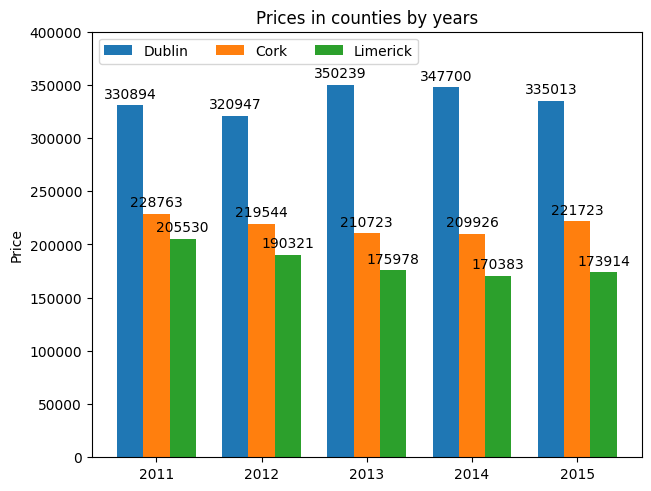

In [40]:
# x-axis array
# years ranging from 2011 to 2015
x_axis = df['Year'][-5:] 

counties_y_axis = {
    'Dublin': df.query('Year >= 2011 and Year <= 2015')['Dublin'],
    'Cork': df.query('Year >= 2011 and Year <= 2015')['Cork'],
    'Limerick': df.query('Year >= 2011 and Year <= 2015')['Limerick']
}

x = np.arange(len(x_axis))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in counties_y_axis.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price')
ax.set_title('Prices in counties by years')
ax.set_xticks(x + width * (len(counties_y_axis) - 1) / 2, x_axis)
ax.legend(loc='upper left', ncols=len(counties_y_axis))
ax.set_ylim(0, 400000)

plt.show()

*The above grouped bar chart focuses on the prices in the three largest cities of Ireland: Dublin, Galway, and Limerick, respectively. Between 2011 and 2015, Dublin consistently had the highest prices, making it the most expensive city. Interestingly, the prices of second-hand houses showed a decline starting from 2011.*



### Dataset link:
https://data.gov.ie/dataset/second-hand-property-prices-by-area-by-year?package_type=dataset
